Compiling model...
Building feed-forward neural network...
'build' took 0.114106 s

'compile' took 0.626494 s

Training model...

Step      Train loss                        Test loss                         Test metric
0         [3.96e-01, 1.00e+00, 1.41e-01]    [3.96e-01, 1.00e+00, 1.41e-01]    []  
1000      [2.50e-02, 9.19e-04, 1.25e-05]    [2.50e-02, 9.19e-04, 1.25e-05]    []  
2000      [2.14e-02, 5.26e-04, 5.42e-07]    [2.14e-02, 5.26e-04, 5.42e-07]    []  
3000      [2.03e-02, 4.62e-04, 9.39e-07]    [2.03e-02, 4.62e-04, 9.39e-07]    []  
4000      [1.93e-02, 4.07e-04, 1.18e-06]    [1.93e-02, 4.07e-04, 1.18e-06]    []  
5000      [1.82e-02, 3.58e-04, 1.71e-06]    [1.82e-02, 3.58e-04, 1.71e-06]    []  

Best model at step 5000:
  train loss: 1.86e-02
  test loss: 1.86e-02
  test metric: []

'train' took 4.724433 s

Saving loss history to C:\Users\ok\Downloads\DL\loss.dat ...
Saving training data to C:\Users\ok\Downloads\DL\train.dat ...
Saving test data to C:\Users\ok\Downloads\D

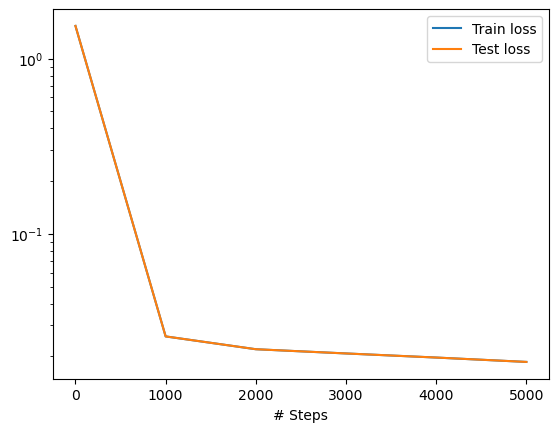

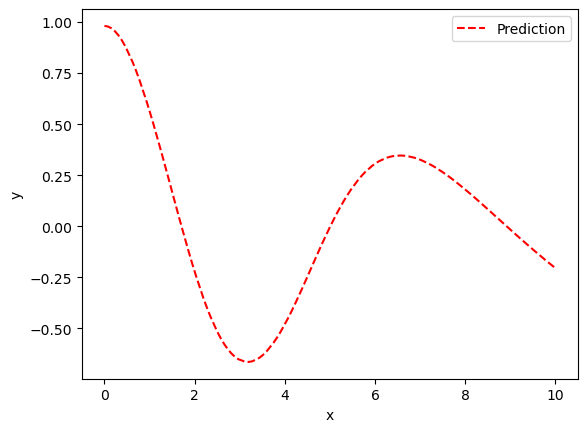

In [4]:
import deepxde as dde
import numpy as np
import tensorflow as tf

# Define the simple harmonic oscillator equation
def sho_eq(x, u):
    du_x = dde.grad.jacobian(u, x, i=0, j=0)
    d2u_xx = dde.grad.hessian(u, x, component=0)
    omega = 1.0  # Angular frequency, change as needed
    return d2u_xx + omega**2 * u

def boundary_l(x, on_boundary):
    return on_boundary and dde.utils.isclose(x[0],0)

# Define the geometry and time domain
geom = dde.geometry.TimeDomain(0, 10)  # Time domain from 0 to 10
def error2(inputs,outputs,X):
    return dde.grad.jacobian(outputs, inputs, i=0, j=None) - 0

ic1 = dde.IC(geom, lambda x: 1,lambda _, on_initial: on_initial)
ic2 = dde.icbc.OperatorBC(geom, error2,boundary_l)

# Define the PDE problem
data = dde.data.TimePDE(geom, sho_eq, [ic1, ic2], num_domain=100, num_boundary=10)

# Define the neural network
net = dde.maps.FNN([1] + [50] * 3 + [1], "tanh", "Glorot uniform")

# Define the model
model = dde.Model(data, net)

# Compile and train the model
model.compile("adam", lr=1e-3)
losshistory, train_state = model.train(epochs=5000)

# Plot the results
dde.saveplot(losshistory, train_state, issave=True, isplot=True)
